# 개념

`1`. 객체간 근접성(Proximity)을 시각화하는 통계기법.

`2`. 군집분석과 같이 개체들을 대상으로 변수들을 측정한 후 개체들 사이의 유사성/비유사성을 측정하여 2차원 또는 3차원 공간상에 점으로 표현

# 목적

`1`. 데이터 속에 잠재해 있는 패턴을 파악한다.

`2`. 그 구조를 소수 차원의 공간에 기하학적으로 표현한다.

`3`. 축소의 목적 : 데이터에 포함되는 정보를 끄집어내기 위해서 다차원척도법을 탐색수단으로써 사용한다.

`4`. 다차원 척도법으로 얻은 결과를, 데이터가 만들어진 현상이나 과정에 고유의 구조로서 의미를 부여한다.

# 종류

## 가. 계량적 MDS(Metric MDS)

* 데이터가 구간 또는 비율척도인 경우 활용

* N개의 케이스에 대해서 p개의 특성변수가 있는 경우, 각 개체들간의 유클리드 거리행렬을 계산하고 개체들간의 비유사성 $S$를 공간상에 표현한다.

### R 실습

In [4]:
library(MASS)

* `MASS` 패키지 안에 내장된 자료를 이용

In [111]:
loc <- cmdscale(eurodist,k=2) ## 거리행렬을 다시 x,y좌표로 바꾸는 작업?

In [115]:
x <- loc[,1]
y <- -loc[,2]  ## y축은 북쪽 도시를 상단에 표시하기 위해 부호를 바꾼다.

In [121]:
options(repr.plot.res=200,repr.plot.height=5,repr.plot.width=10)

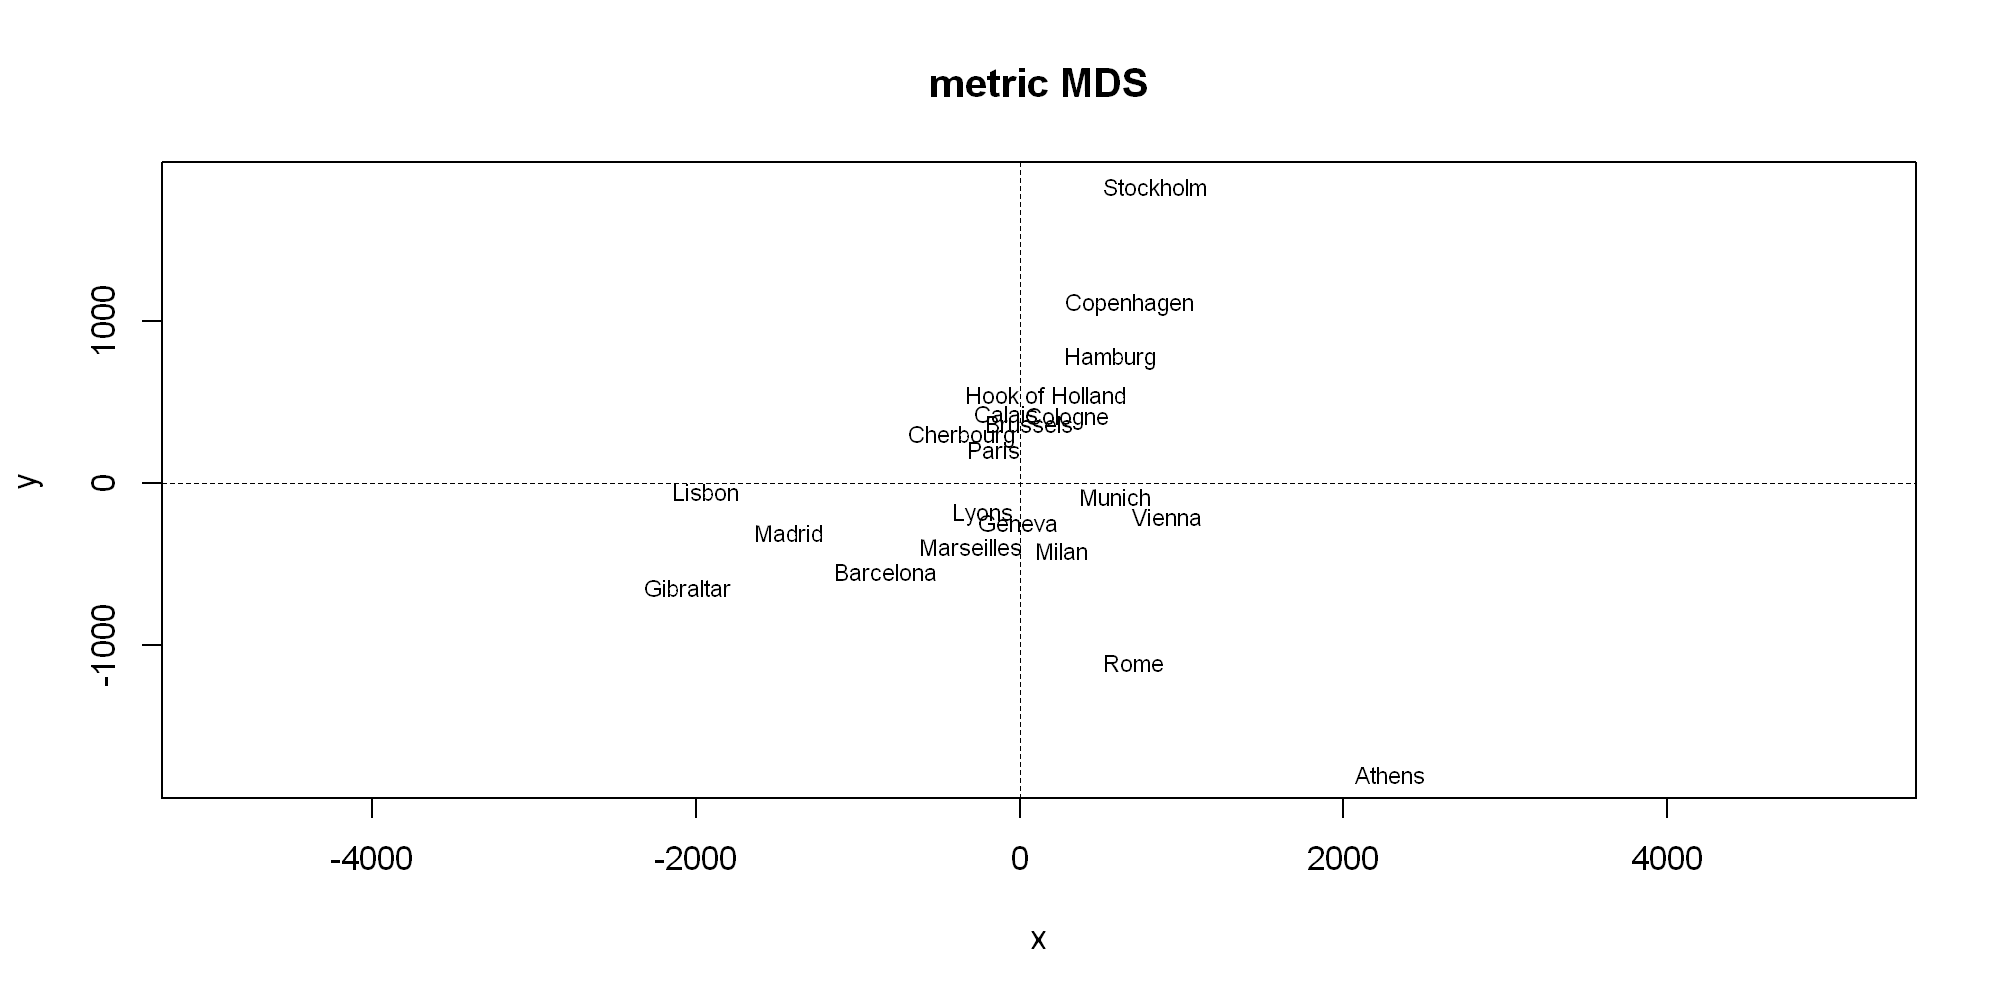

In [128]:
plot(x,y,type="n",asp=1,main="metric MDS" )
text(x,y,rownames(loc),cex=0.7)
abline(v=0,h=0,lty=2,lwd=0.5)

* 즉 유사한 도시들은 가까이 밀집해있고 그렇지 않은 도시들은 멀리 떨어져있음을 확인할 수 있다.

## 나. 비계량적 MDS (Nonmetric MDS)

* 데이터가 **순서척도** 인 경우 활용한다.

* 개체들간의 거리가 순서로 주어진 경우에는 순서척도를 거리의 속성과 같도록 변환

* 그 후 거리를 생성하여 적용한다.

* `R` 에서는 `isoMDS` 함수를 이용한다.

## R 실습

* 기존의 데이터프레임을 행렬구조로 변환해줌

In [145]:
swiss.x <- as.matrix(swiss[,-1])

In [146]:
swiss.dist <- dist(swiss.x)

In [147]:
swiss.mds <- isoMDS(swiss.dist)

initial  value 2.979731 
iter   5 value 2.431486
iter  10 value 2.343353
final  value 2.338839 
converged


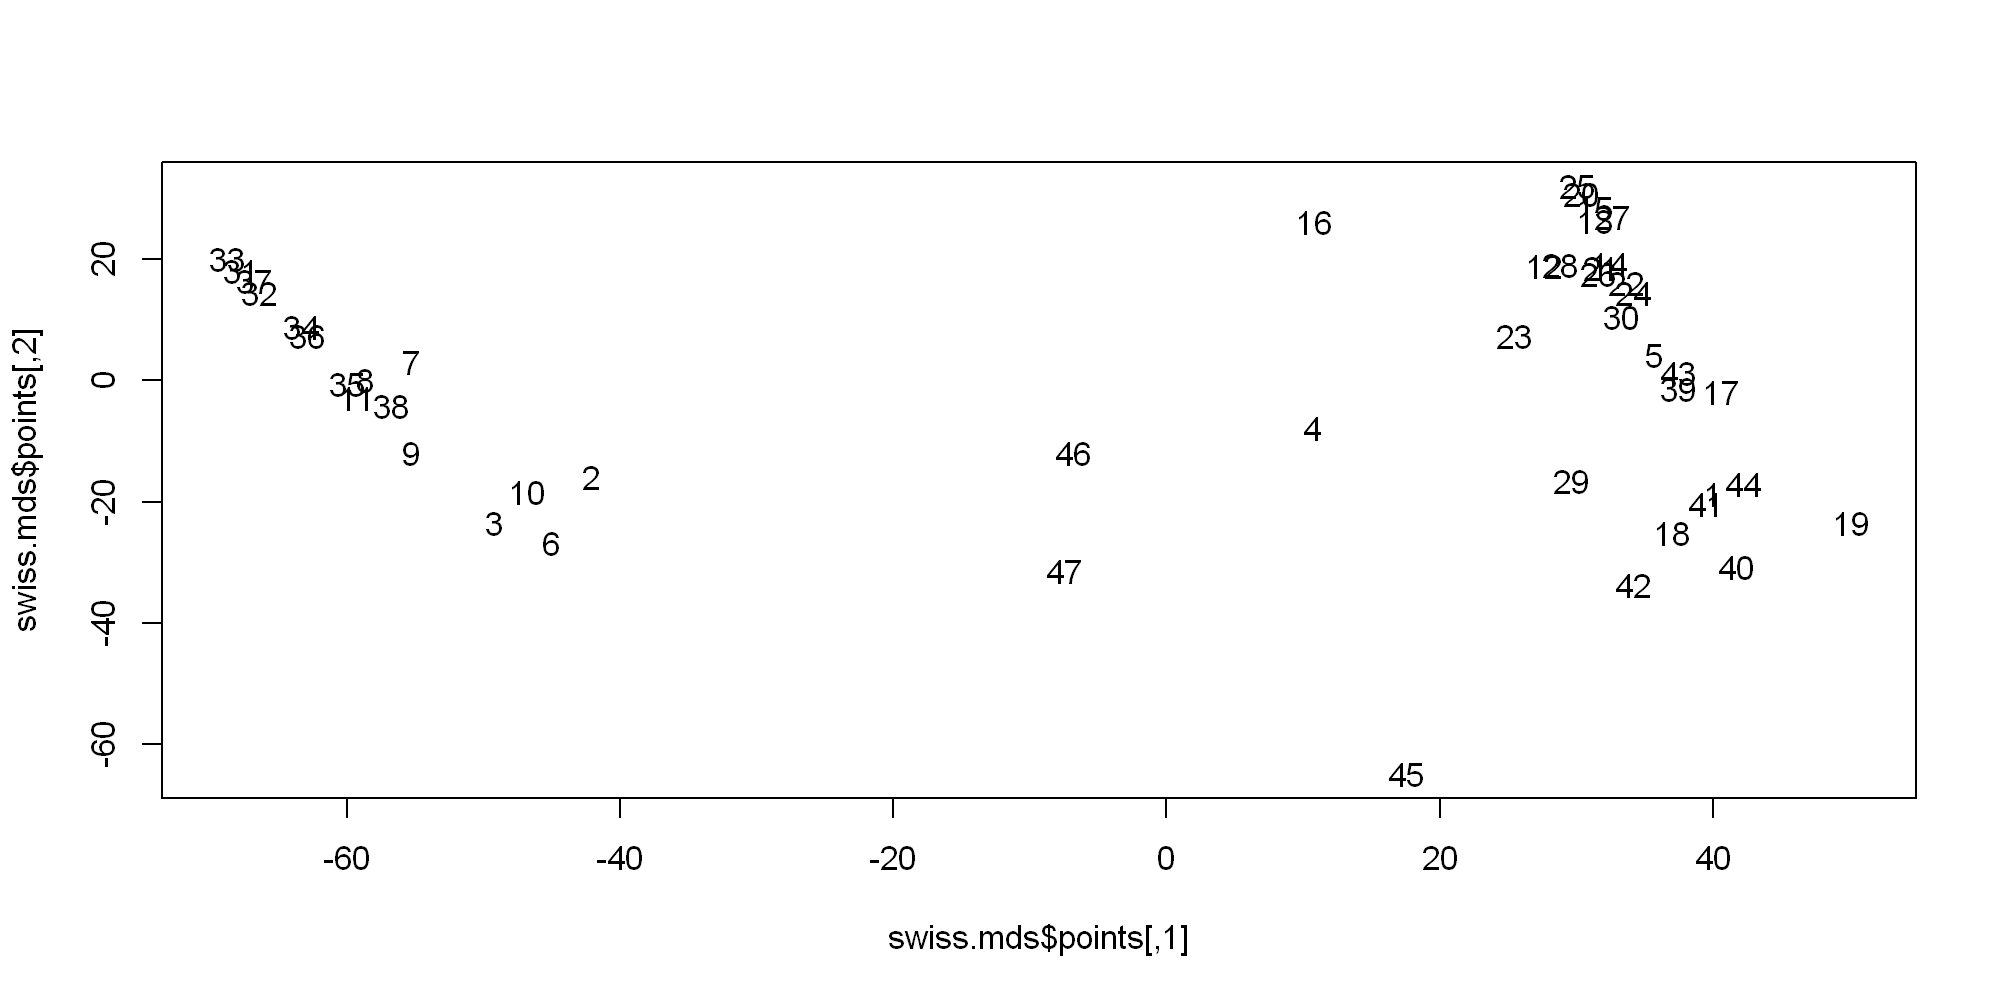

In [152]:
plot(swiss.mds$points,type="n")
text(swiss.mds$points,labels=as.character(1:nrow(swiss.x)))